In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define transformations
transform = transforms.Compose([
    transforms.CenterCrop((120, 120)),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

# Load CelebA dataset
dataset = datasets.CelebA(root='./data', split='train', transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=10, shuffle=False)

Files already downloaded and verified


In [34]:
iter_imgs = iter(dataloader)

In [41]:
# Get a batch of 10 images
imgs, lbls = next(iter_imgs)

In [36]:
def plot_image_grid(n_rows:int, n_cols:int, images: torch.Tensor, labels: torch.Tensor):
    """
    Plots a 5x2 grid of images with corresponding labels on top.
    """

    # Create a figure with 5x2 grid
    _, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4))
    axes = axes.ravel()  # Flatten the 2D array of axes into a 1D array for easy iteration

    for i in range(10):
        image = images[i].permute(1, 2, 0).numpy()
        
        # Plot the image
        axes[i].imshow(image)
        axes[i].axis('off')
        
        if (labels[i][20] == 1):
            axes[i].set_title("male")
        else:
            axes[i].set_title("female")

    # Adjust spacing
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have a tensor `batch_images` of shape (10, 3, 28, 28)
# and a tensor of labels `batch_labels` of shape (10, 40)
# batch_images = torch.rand(10, 3, 28, 28)
# batch_labels = torch.randint(0, 2, (10, 40))
# plot_image_grid(batch_images, batch_labels)

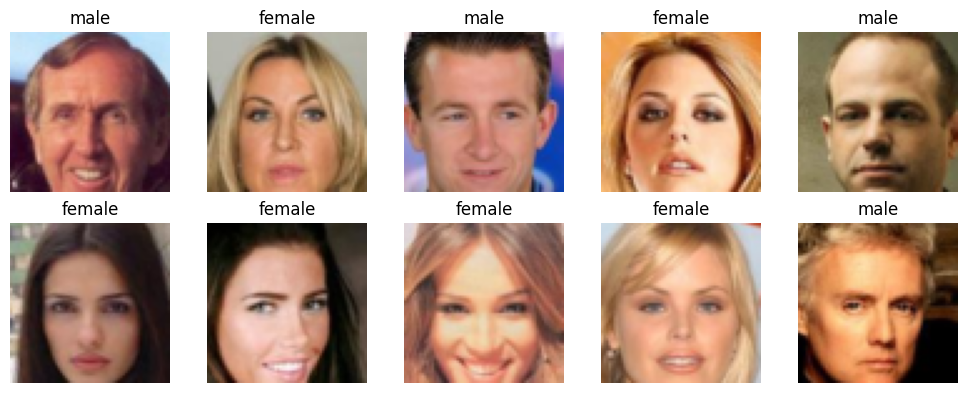

In [42]:
plot_image_grid(2, 5, imgs, lbls)